# 最小二乗法

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt

In [2]:
n = 50
N = 1000
ep = 0.05 #エラー率 [%]
x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)

In [3]:
y = np.sin(np.pi * x)/(np.pi*x) + ep*rand(n)

## 基本的な線形モデル

基底関数
三角多項基底関数を利用して解いてみる
$$
\Psi(x) = (1, sin\frac{x}{2}, cos\frac{x}{2}, sin\frac{2x}{2}, con\frac{x}{2}, ... , , sin\frac{15x}{2}, cos\frac{15x}{2}) 
$$

In [4]:
# 計画行列Φを求める
k = 15
p = np.ones([2*(k+1),n])
P = np.ones([2*(k+1),N])
for j in range(1, k+1):
    p [2*j]      = np.sin(0.5*j*x)
    p [2*j+1] = np.cos(0.5*j*x)
    P [2*j]      = np.sin(0.5*j*X)
    P [2*j+1] = np.cos(0.5*j*X)
    
t = np.linalg.pinv(p).T.dot(y)
F = P.T.dot(t)

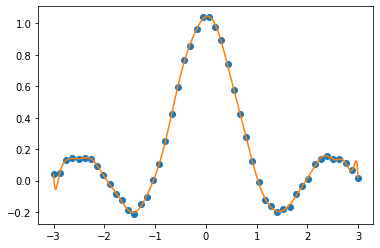

In [5]:
plt.plot(x, y, 'o')
plt.plot(X, F)
plt.show()

---

## 確立的勾配法
ガウスカーネルモデルを採用して考えてみる
$$
K(x,c) = \exp (-\frac{||x-c||^2}{2h^2})
$$

h : バンド幅、c : ガウス分布の中心

In [10]:
h = 0.3 #ガウス分布のバンド幅
e = 0.1 #勾配効果の歩幅
thr = 0.000001 # 収束判定閾値
num = 2*h**2

0.18